## Artificial vortex array flow test

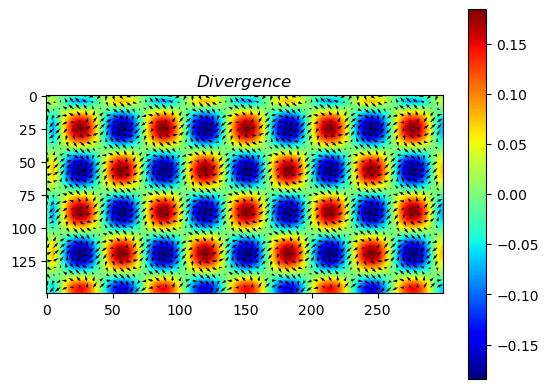

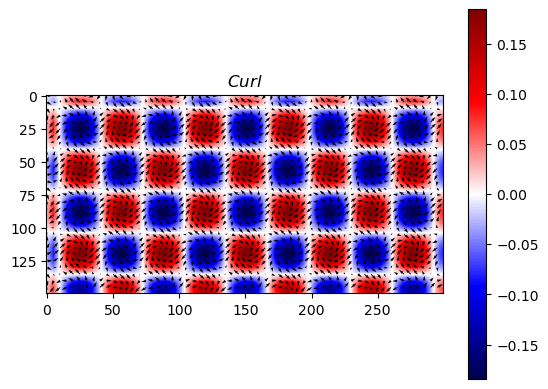

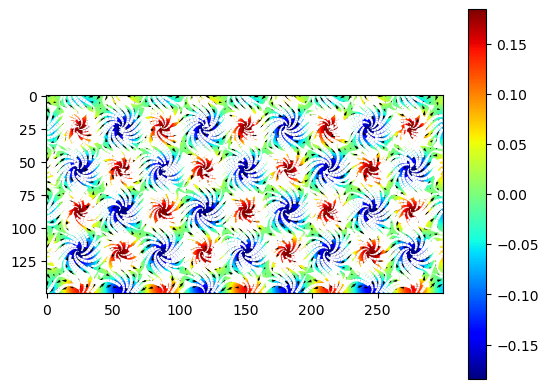

In [2]:
# %% OPTION 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

def divergence_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 11
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

y, x = np.mgrid[0:150, 0:300]
u = np.cos((x + y)/10) #* np.random.rand(*x.shape)
v = np.sin((x - y)/10) #* np.random.rand(*x.shape)
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=10)
vorticity = smooth_field(curl_npgrad(field), filter_size=10)

plt.figure()
step = 5
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1])
plt.imshow(divergence, cmap="jet")
plt.title("$Divergence$")
plt.colorbar()

plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1])
plt.imshow(vorticity, cmap="seismic")
plt.title("$Curl$")
plt.colorbar()

#  Varying line width along a streamline
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
step = 5
plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1], color="k")#, scale=30
plt.streamplot(x, y, field[..., 0], -field[..., 1], density=3., color='white', linewidth=lw)
plt.imshow(divergence, cmap="jet")
plt.colorbar()

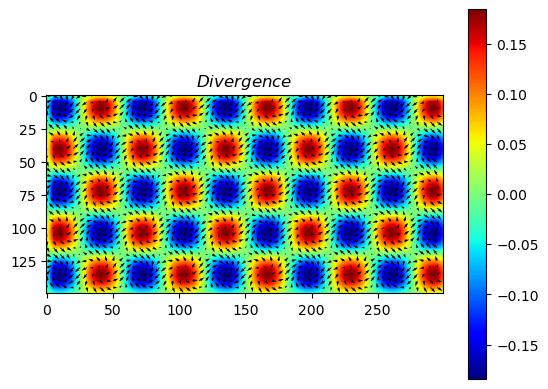

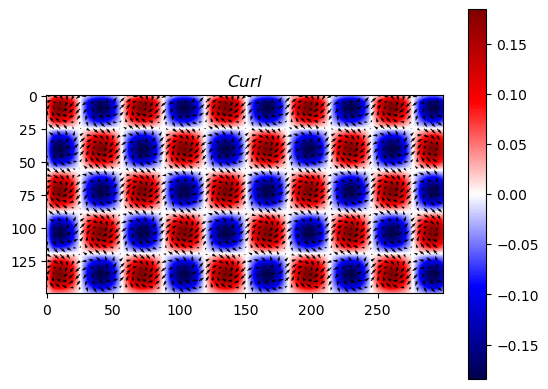

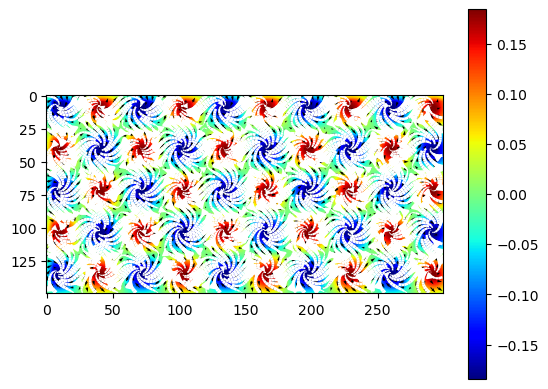

In [2]:
# %% OPTION 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
%matplotlib inline

def divergence_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 11
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

y, x = np.mgrid[0:150, 0:300]
u = np.cos((x + y)/10) #* np.random.rand(*x.shape)
v = np.sin((x - y)/10) #* np.random.rand(*x.shape)
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=10)
vorticity = smooth_field(curl_npgrad(field), filter_size=10)

plt.figure()
step = 5
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.imshow(divergence.T, cmap="jet")
plt.title("$Divergence$")
plt.colorbar()

plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.imshow(vorticity.T, cmap="seismic")
plt.title("$Curl$")
plt.colorbar()

#  Varying line width along a streamline
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
step = 5
plt.figure()
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1], color="k")#, scale=30
plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='white', linewidth=lw)
plt.imshow(divergence.T, cmap="jet")
plt.colorbar()

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


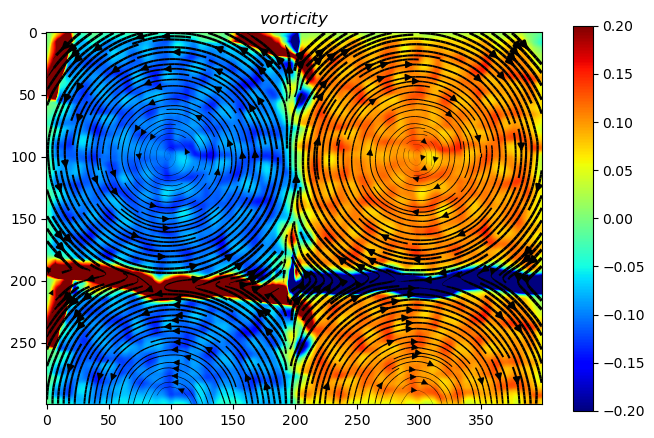

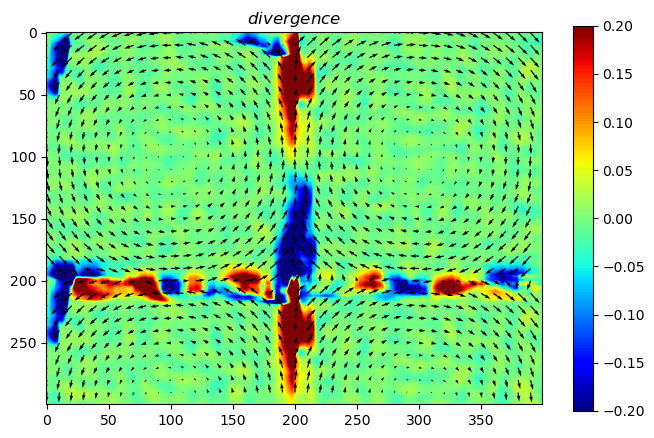

In [3]:
# %%
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import io
%matplotlib inline

def divergence_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(flow):
    flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dy = np.gradient(Fx, axis=1)
    dFy_dx = np.gradient(Fy, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

def smooth_field(f, filter_size=11):
    filter_size = 15
    filt = np.outer(np.exp(np.linspace(-1, 1, filter_size)), np.exp(np.linspace(-1, 1, filter_size)))
    filt = filt / filt.sum()
    return convolve2d(f, filt, mode='same')

# Load the images
im = io.imread("../_bacteria/hbec_images/rotations-1.tif")[:,:-100, :]
im_num = 0
im1 = im[im_num]
im2 = im[im_num+1]

# Calculate the optical flow using Lucas-Kanade method
flow = cv2.calcOpticalFlowFarneback(im1,im2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)  
u, v = flow[:,:,0], flow[:,:,1]
y, x = np.mgrid[0:im1.shape[0], 0:im1.shape[1]]
field = np.stack((u, v), axis=-1)
divergence = smooth_field(divergence_npgrad(field), filter_size=50)
vorticity = smooth_field(curl_npgrad(field), filter_size=3)

plt.figure(figsize=(8,5))
step = 10
speed = np.sqrt(u**2 + v**2)
lw = 3*speed / speed.max()
# plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='k', linewidth=lw)
plt.imshow(vorticity.T, cmap="jet", vmin=-.2, vmax=.2)
plt.title("$vorticity$")
plt.colorbar()

plt.figure(figsize=(8,5))
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], -field[::step, ::step, 1])
# plt.streamplot(x, y, field[..., 0], field[..., 1], density=3., color='k', linewidth=lw)
plt.imshow(divergence.T, cmap="jet", vmin=-.2, vmax=.2)
plt.title("$divergence$")
plt.colorbar()

# Create animated gif with flows

In [4]:
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from natsort import natsorted
%matplotlib qt

image_list = glob.glob(r"C:/Users/victo/Downloads/SB_lab/RPE1_C2C12_/Test002/*.tif")
image_list = natsorted(image_list, key=lambda y: y.lower())

fig, ax = plt.subplots(figsize=(10,10))
ax.set_axis_off()


def update(frame):
    ax.clear()
    im1 = image_list[frame]
    im2 = image_list[frame+1]
    img1 = cv2.imread(im1)[:,:,0]
    img2 = cv2.imread(im2)[:,:,0]
    flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)       
    step = 15
    ax.imshow(img1, cmap="gray")
    x = np.arange(0, flow.shape[1], step, dtype=np.int16)
    y = np.arange(0, flow.shape[0], step, dtype=np.int16)
    return ax.quiver(x, y, flow[::step, ::step, 0], -flow[::step, ::step, 1], color="red")

anim = FuncAnimation(fig, update, frames=len(image_list)-1, interval=100)
anim.save(r"C:/Users/victo/Downloads/SB_lab/RPE1_C2C12_/test002.gif") 
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

## Averaged flows


In [3]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
%matplotlib qt

# image_list = glob.glob(r"C:/Users/victo/Downloads/SB_lab/RPE1_C2C12_/Test001/*.tif")
image_list_all = glob.glob(r"C:\Users\victo\My Drive\Curie\Trinish\30_01_18_RPE1_C2C12_5x_phase_nuclei\*s14*.tif")
image_list_all = natsorted(image_list_all, key=lambda y: y.lower())
image_list = image_list_all[50:60]

fig, ax = plt.subplots(1,2, figsize=(12,6))
# ax.set_axis_off()

u = np.zeros_like(cv2.imread(image_list[0])[:,:,0], dtype=np.float32)
v = np.zeros_like(u)
prev = cv2.imread(image_list[0])
prevgray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(prev)

for im1, im2 in zip(image_list[:-1], image_list[1:]):
    img1 = cv2.imread(im1)[:,:,0]
    img2 = cv2.imread(im2)[:,:,0]
    flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)  
    u += flow[..., 0]
    v += flow[..., 1]

mag, ang = cv2.cartToPolar(u, v)
hsv[..., 1] = 255
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

ax[0].imshow(u, cmap="seismic")   
# ax[1].imshow(v, cmap="seismic")   
# cf = ax[1].imshow(np.arctan2(v,u)*180/np.pi, cmap="jet")    
cf = ax[1].imshow(rgb, cmap="jet")  
plt.colorbar(cf, ax=ax[1])


## Add Orientation

In [4]:
from scipy.ndimage import gaussian_filter
import sys
sys.path.append('../vasco_scripts')  # add the relative path to the folder
from defects import *  # import the module from the folder

def shear(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx, dFx_dy = np.gradient(Fx)
    dFy_dx, dFy_dy = np.gradient(Fy)
    return dFx_dy + dFy_dx

def divergence_npgrad(flow):
    # flow = np.swapaxes(flow, 0, 1)
    Fx, Fy = flow[:, :, 0], flow[:, :, 1]
    dFx_dx = np.gradient(Fx, axis=0)
    dFy_dy = np.gradient(Fy, axis=1)
    return dFx_dx + dFy_dy

flow = np.stack((u, v), axis=-1)
divergence = gaussian_filter(divergence_npgrad(flow), sigma=30)

img = cv2.imread(image_list[-1])[..., 0]

yy, xx = np.mgrid[0:img.shape[0], 0:img.shape[1]]
ori, coh, E = orientation_analysis(img, 25)
ori, coh, E = orientation_analysis(img, 25)
k = compute_topological_charges(-ori, int_area='cell', origin='lower')
defects = localize_defects(k, x_grid=xx, y_grid=yy)
compute_defect_orientations(-ori, defects, method='interpolation', x_grid=xx[0,:], y_grid=yy[:,0], interpolation_radius=5,  min_sep=1)
plushalf = defects[defects['charge']==.5]
minushalf = defects[defects['charge']==-.5]


In [5]:
last_img = cv2.imread(image_list_all[50])[..., 0]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(last_img)
plt.figure()
plt.imshow(255-img_clahe, "gray")
print(image_list_all[-1])

C:\Users\victo\My Drive\Curie\Trinish\30_01_18_RPE1_C2C12_5x_phase_nuclei\RPE1_Fucci_C2C12_5x_15min_phase_nuclei_w1Trans_s14_t301.TIF


In [6]:
# Apply Contrast Limited Adaptive Histogram Equalization
last_img = cv2.imread(image_list_all[50])[..., 0]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(last_img)
plt.imshow(255-img_clahe, "gray")
plt.imshow(divergence, "jet", alpha=.3, vmin=-divergence.max()/2, vmax=divergence.max()/2)
plt.colorbar()

experiment = str(image_list[-1].split("_s")[-1].split("_")[0])
frame = str(image_list[-1].split("t")[-1].split(".")[0])
plt.title("$Divergence~(exp. ~s=$" + experiment + "$,~t=$" + frame + "$)$")

alpha_half, scale_half = .6, 40
plt.plot(plushalf['x'], plushalf['y'],'ro',markersize=10,label=r'+1/2 defect', alpha=alpha_half)
plt.quiver(plushalf['x'], plushalf['y'], 
    np.cos(plushalf['ang1']), -np.sin(plushalf['ang1']), 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=scale_half, alpha=alpha_half)

for i in range(3):
    plt.quiver(minushalf['x'], minushalf['y'], 
        np.cos(minushalf['ang'+str(i+1)]), -np.sin(minushalf['ang'+str(i+1)]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=scale_half, alpha=alpha_half)


s = 30
# plt.imshow(rgb, "gray")

# plt.quiver(xx[::s,::s], yy[::s,::s], 
#     np.cos(ori)[::s,::s], np.sin(ori)[::s,::s], 
#     headaxislength=0, headwidth=0, headlength=0, 
#     color='k', scale=scale_half, pivot='mid', alpha=.3)

s = 15

# plt.quiver(xx[::s, ::s], yy[::s, ::s], 
#            u[::s, ::s], -v[::s, ::s], 
#             # color=color[::s, ::s,:],
#             color="k",
#             scale=600, pivot='mid', alpha=.8)
# plt.streamplot(xx, yy, 
#                gaussian_filter(u, sigma=10), gaussian_filter(v, sigma=10), 
#     density=u.shape[0]//200, color='k')


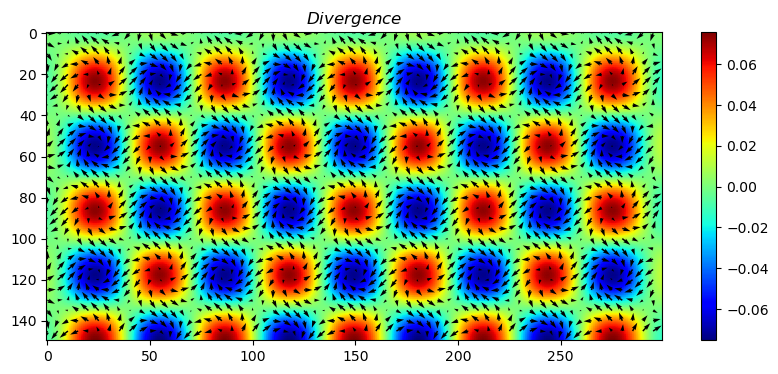

In [11]:
%matplotlib inline
y, x = np.mgrid[0:150, 0:300]
u = np.cos((x + y)/10) #* np.random.rand(*x.shape)
v = np.sin((x - y)/10) #* np.random.rand(*x.shape)
field = np.stack((u, v), axis=-1)
divergence = gaussian_filter(divergence_npgrad(field), sigma=10)
vorticity = gaussian_filter(curl_npgrad(field), sigma=10)

plt.figure(figsize=(10,4))
step = 5
plt.quiver(x[::step, ::step], y[::step, ::step], field[::step, ::step, 0], field[::step, ::step, 1])
plt.imshow(divergence, cmap="jet")
plt.title("$Divergence$")
plt.colorbar()

KeyboardInterrupt: 

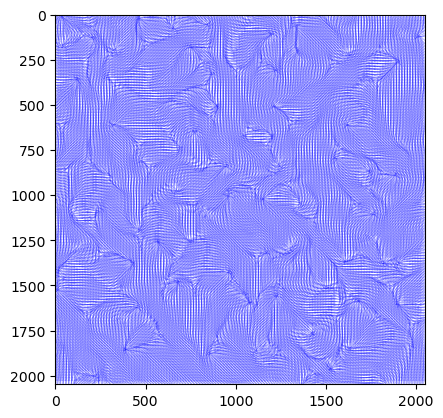

In [12]:
dd = -1
x, y, w, h = 500, 600, 500, 500
ori_ = ori#[y:y+h, x:x+w]
yy, xx = np.mgrid[:ori_.shape[0], :ori_.shape[1]]
# plt.style.use('_mpl-gallery-nogrid')
fig = plt.figure()
ax = fig.add_subplot(111)
blank = 255*np.ones_like(ori_)
blank[0,0] = 0
ax.imshow(blank, "gray")
# plt.imshow(img, "gray")
# plt.imshow(ori * 180/np.pi, "jet")

t = 0
ox, oy = np.cos(ori_), np.sin(ori_)
ox[oy<t] = -ox[oy<t]
oy[oy<t] = -oy[oy<t]
 

# ax.quiver(xx[:dd:s,:dd:s], yy[:dd:s,:dd:s], 
#     np.cos(ori_)[:dd:s,:dd:s], np.sin(ori_)[:dd:s,:dd:s], 
#     # headaxislength=0, headwidth=0, headlength=0, 
#     color='r', scale=30, pivot='mid', alpha=.4)
plt.quiver(xx[:dd:s,:dd:s], yy[:dd:s,:dd:s], 
    ox[:dd:s,:dd:s], oy[:dd:s,:dd:s], 
    # headaxislength=0, headwidth=0, headlength=0, 
    color='b', scale=30, pivot='mid', alpha=.3)

sp = ax.streamplot(xx, yy, 
    ox, -oy, 
    density=ori_.shape[0]//100, color='k',# arrowsize=0, 
    arrowstyle='-', maxlength=100.0,
    integration_direction='both')

ax.set_facecolor('lavender')

In [ ]:
bins = 30
plt.figure()
plt.hist(ox.ravel(), rwidth=.9, bins=bins//2, density=True)
plt.hist(oy.ravel(), rwidth=.9, bins=bins, density=True)

(array([0.63609952, 0.48457824, 0.35894169, 0.32651801, 0.32694717,
        0.33377598, 0.32464705, 0.29899963, 0.28344456, 0.24933439,
        0.22553138, 0.20426203, 0.2019242 , 0.20943444, 0.2261714 ,
        0.23531538, 0.25512043, 0.25242881, 0.2244849 , 0.24688746,
        0.31269099, 0.35183054, 0.41173152, 0.41748725, 0.46539809,
        0.51025968, 0.65031052, 0.74402409, 1.51263415, 4.50826073]),
 array([-0.89999992, -0.83666658, -0.77333325, -0.70999992, -0.64666659,
        -0.58333325, -0.51999992, -0.45666659, -0.39333329, -0.32999995,
        -0.26666662, -0.20333327, -0.13999996, -0.07666662, -0.01333329,
         0.05000004,  0.11333337,  0.17666671,  0.24000004,  0.30333337,
         0.3666667 ,  0.43000004,  0.49333337,  0.55666667,  0.62      ,
         0.68333334,  0.74666667,  0.81      ,  0.87333333,  0.93666667,
         1.        ]),
 <BarContainer object of 30 artists>)